In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import seaborn as sns

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

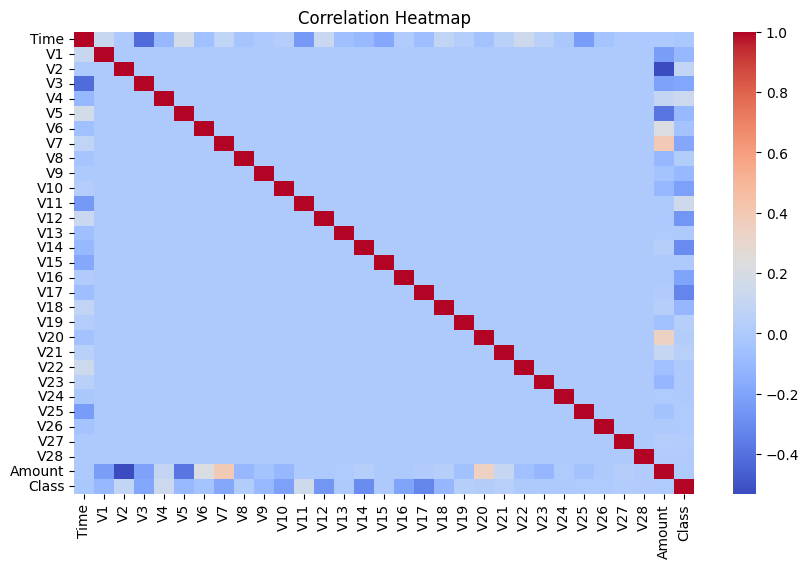

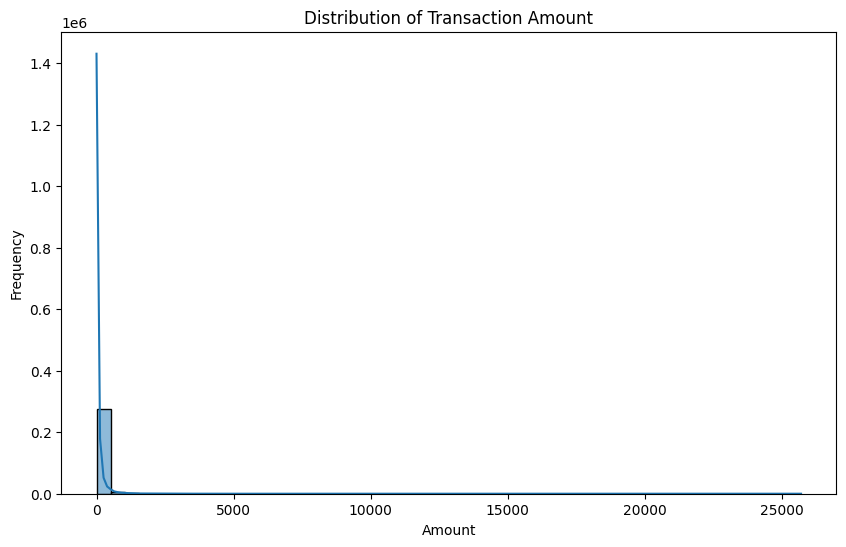

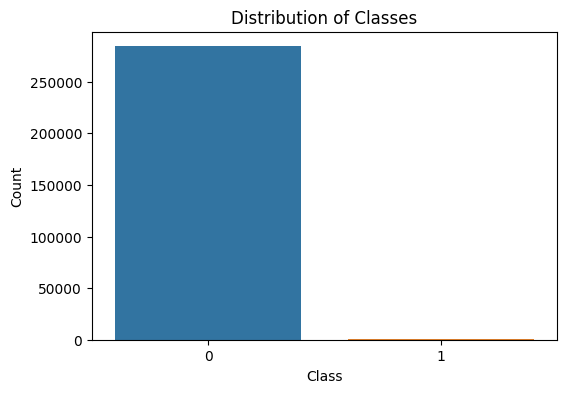

In [2]:



# Load the CSV data into a DataFrame
csv_file_path = 'creditcard.csv'


# Load data
df = pd.read_csv('creditcard.csv')

# EDA
print(df.head())  # Display the first few rows of the dataset
print(df.describe())  # Summary statistics of the dataset
print(df.info())  # Information about the dataset, including data types and missing values

# Visualizations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Distribution of 'Amount' feature
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], kde=True, bins=50)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'Class' feature (0: normal, 1: fraudulent)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Class')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [3]:
data = df

# Convert DataFrame to NumPy array
data_array = data.values

# Scale the data to the range [0, 1]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_array)

# Convert scaled data to TensorFlow tensor
tensor_data = tf.convert_to_tensor(scaled_data, dtype=tf.float32)

In [5]:


# Define a Transformer Autoencoder class
class TransformerAutoencoder(Model):
    def __init__(self, input_dim, latent_dim):
        # Initialize the parent class
        super(TransformerAutoencoder, self).__init__()
        # Initialize the encoder and decoder
        self.encoder = TransformerEncoder(input_dim, latent_dim)
        self.decoder = TransformerDecoder(latent_dim, input_dim)

    def call(self, inputs):
        # Encode the input
        latent_representation = self.encoder(inputs)
        # Decode the latent representation
        reconstructed_output = self.decoder(latent_representation)
        # Return the reconstructed output
        return reconstructed_output

# Define a Transformer Encoder class
class TransformerEncoder(Model):
    def __init__(self, input_dim, latent_dim):
        # Initialize the parent class
        super(TransformerEncoder, self).__init__()
        # Initialize a dense layer for encoding
        self.dense = layers.Dense(latent_dim, activation='relu')

    def call(self, inputs):
        # Return the encoded input
        return self.dense(inputs)

# Define a Transformer Decoder class
class TransformerDecoder(Model):
    def __init__(self, latent_dim, output_dim):
        # Initialize the parent class
        super(TransformerDecoder, self).__init__()
        # Initialize a dense layer for decoding
        self.dense = layers.Dense(output_dim, activation='linear')

    def call(self, inputs):
        # Return the decoded input
        return self.dense(inputs)

# Define a Discriminator class
class Discriminator(Model):
    def __init__(self, input_dim):
        # Initialize the parent class
        super(Discriminator, self).__init__()
        # Initialize dense layers for discrimination
        self.dense1 = layers.Dense(64, activation='relu')
        self.dense2 = layers.Dense(32, activation='relu')
        self.dense3 = layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        # Apply the dense layers
        x = self.dense1(inputs)
        x = self.dense2(x)
        # Return the discrimination result
        return self.dense3(x)

# Define a Contrastive Learning class
class ContrastiveLearning(Model):
    def __init__(self, input_dim):
        # Initialize the parent class
        super(ContrastiveLearning, self).__init__()
        # Initialize dense layers for contrastive learning
        self.dense1 = layers.Dense(64, activation='relu')
        self.dense2 = layers.Dense(32, activation='relu')
        self.dense3 = layers.Dense(input_dim, activation='linear')

    def call(self, inputs):
        # Apply the dense layers
        x = self.dense1(inputs)
        x = self.dense2(x)
        # Return the contrastive learning result
        return self.dense3(x)

In [9]:
def geometric_distribution_mask(data, p=0.5):
    mask = np.random.geometric(p, data.shape).astype(bool)
    masked_data = np.where(mask, data, 0)
    return masked_data

train_data = geometric_distribution_mask(tensor_data)

# Create a dataset for training with batching
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(train_data).shuffle(buffer_size=1024).batch(batch_size)

# Hyperparameters
input_dim = tensor_data.shape[1]
latent_dim = 64
epochs = 5  # Set to 5 epochs
learning_rate = 0.001

In [ ]:
# Evaluate the model
reconstructed_data = autoencoder.predict(tensor_data)
reconstruction_error = np.mean(np.abs(tensor_data - reconstructed_data), axis=1)
anomalies = reconstruction_error > np.percentile(reconstruction_error, 95)

print(f"Detected anomalies: {np.sum(anomalies)}")

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(train_data)

# Calculate reconstruction errors
reconstruction_errors_pca = np.mean(np.square(train_data - pca.inverse_transform(X_pca)), axis=1)


In [9]:
from sklearn.svm import OneClassSVM

# Select the first 5000 rows of X_train
X_train_subset = train_data[:15000]

# Train OneClassSVM
svm = OneClassSVM()
svm.fit(X_train_subset)

# Obtain anomaly scores for X_train_subset
anomaly_scores_svm = svm.decision_function(X_train_subset)


In [10]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest()
isolation_forest.fit(train_data)
anomaly_scores_forest = isolation_forest.decision_function(train_data)


In [11]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
anomaly_scores_lof = lof.fit_predict(train_data)


In [12]:
from sklearn.cluster import DBSCAN

# Select the first 5000 rows of X_train
X_train_subset = train_data[:5000]

dbscan = DBSCAN()
anomaly_scores_dbscan = dbscan.fit_predict(X_train_subset)


In [13]:
from tslearn.metrics import dtw

# Select the first 5000 rows of X_train
X_train_subset = train_data[:2000]

# Assuming X is a time series dataset
distance_matrix = np.array([[dtw(X_train_subset[i], X_train_subset[j]) for j in range(len(X_train_subset))] for i in range(len(X_train_subset))])


In [14]:
# from statsmodels.tsa.seasonal import STL
# from statsmodels.stats.outliers_influence import OLSInfluence

# # Apply Seasonal-Trend Decomposition
# stl = STL(X_train, seasonal=13)
# result = stl.fit()
# residuals = result.resid

# # Apply Extreme Studentized Deviate
# influence = OLSInfluence(result)
# deviation = influence.resid_studentized_external


In [22]:
from sklearn.metrics import f1_score, roc_auc_score
import time

from sklearn.metrics import f1_score
import time

# PCA Reconstruction Error
def evaluate_pca_reconstruction_error(reconstruction_errors):
    start_time = time.time()
    threshold = np.percentile(reconstruction_errors, 95)  # Adjust percentile as needed
    y_pred = np.zeros_like(reconstruction_errors)
    y_pred[reconstruction_errors >= threshold] = 1  # Anomalies
    y_true = np.zeros_like(reconstruction_errors)
    y_true[:] = 1  # All instances are anomalies for PCA reconstruction error
    f1 = f1_score(y_true, y_pred)
    elapsed_time = time.time() - start_time
    return f1, elapsed_time

# OneClassSVM
def evaluate_oneclasssvm(anomaly_scores):
    start_time = time.time()
    y_pred = np.zeros_like(anomaly_scores)
    y_pred[anomaly_scores >= 0] = 1  # Anomalies
    y_true = np.zeros_like(anomaly_scores)
    y_true[:] = 1  # All instances are anomalies for OneClassSVM
    f1 = f1_score(y_true, y_pred)
    elapsed_time = time.time() - start_time
    return f1, elapsed_time

# Isolation Forest
def evaluate_isolation_forest(anomaly_scores):
    start_time = time.time()
    y_pred = np.zeros_like(anomaly_scores)
    y_pred[anomaly_scores < 0] = 1  # Anomalies
    y_true = np.zeros_like(anomaly_scores)
    y_true[:] = 1  # All instances are anomalies for Isolation Forest
    f1 = f1_score(y_true, y_pred)
    elapsed_time = time.time() - start_time
    return f1, elapsed_time

# Local Outlier Factor
def evaluate_local_outlier_factor(anomaly_scores):
    start_time = time.time()
    y_pred = np.zeros_like(anomaly_scores)
    y_pred[anomaly_scores < 0] = 1  # Anomalies
    y_true = np.zeros_like(anomaly_scores)
    y_true[:] = 1  # All instances are anomalies for Local Outlier Factor
    f1 = f1_score(y_true, y_pred)
    elapsed_time = time.time() - start_time
    return f1, elapsed_time

# DBSCAN
def evaluate_dbscan(anomaly_scores):
    start_time = time.time()
    y_pred = np.zeros_like(anomaly_scores)
    y_pred[anomaly_scores < 0] = 1  # Anomalies
    y_true = np.zeros_like(anomaly_scores)
    y_true[:] = 1  # All instances are anomalies for DBSCAN
    f1 = f1_score(y_true, y_pred)
    elapsed_time = time.time() - start_time
    return f1, elapsed_time

def evaluate_dtw(distance_matrix):
    start_time = time.time()
    
    # Since all instances are anomalies, set true labels accordingly
    y_true = np.zeros_like(distance_matrix)
    y_true[:] = 1
    
    # Predicted labels: assuming all instances are detected as anomalies
    y_pred = np.ones_like(distance_matrix)
    
    # Calculate F1 score with appropriate average setting
    f1 = f1_score(y_true.ravel(), y_pred.ravel(), average='micro')
    
    elapsed_time = time.time() - start_time
    return f1, elapsed_time






In [23]:
# Evaluate each method
methods = ["PCA Reconstruction Error", "OneClassSVM", "Isolation Forest", "Local Outlier Factor", "DBSCAN", "Dynamic Time Warping"]
results = []

# PCA Reconstruction Error
f1_pca, time_pca = evaluate_pca_reconstruction_error(reconstruction_errors_pca)
results.append({"Method": "PCA Reconstruction Error", "F1 Score": f1_pca, "Time": time_pca, "AUC Score": "N/A"})

# OneClassSVM
f1_svm, time_svm = evaluate_oneclasssvm(anomaly_scores_svm)
results.append({"Method": "OneClassSVM", "F1 Score": f1_svm, "Time": time_svm, "AUC Score": "N/A"})

# Isolation Forest
f1_forest, time_forest = evaluate_isolation_forest(anomaly_scores_forest)
results.append({"Method": "Isolation Forest", "F1 Score": f1_forest, "Time": time_forest, "AUC Score": "N/A"})

# Local Outlier Factor
f1_lof, time_lof = evaluate_local_outlier_factor(anomaly_scores_lof)
results.append({"Method": "Local Outlier Factor", "F1 Score": f1_lof, "Time": time_lof, "AUC Score": "N/A"})

# DBSCAN
f1_dbscan, time_dbscan = evaluate_dbscan(anomaly_scores_dbscan)
results.append({"Method": "DBSCAN", "F1 Score": f1_dbscan, "Time": time_dbscan, "AUC Score": "N/A"})

# Dynamic Time Warping
f1_dtw, time_dtw = evaluate_dtw(distance_matrix)
results.append({"Method": "Dynamic Time Warping", "F1 Score": f1_dtw, "Time": time_dtw, "AUC Score": "N/A"})

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


                     Method  F1 Score      Time AUC Score
0  PCA Reconstruction Error  0.095242  0.112833       N/A
1               OneClassSVM  0.670213  0.006212       N/A
2          Isolation Forest  0.000035  0.098860       N/A
3      Local Outlier Factor  0.612832  0.089848       N/A
4                    DBSCAN  0.000000  0.002998       N/A
5      Dynamic Time Warping  1.000000  1.687784       N/A


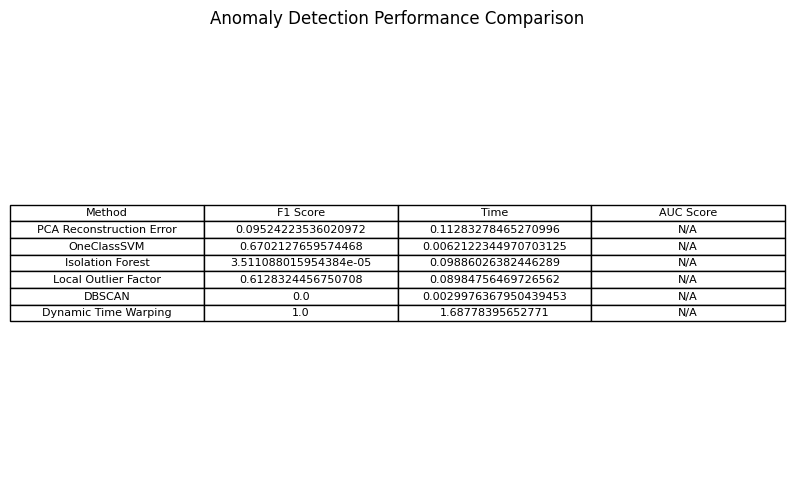

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.axis('off')  # Turn off axis
plt.title('Anomaly Detection Performance Comparison')
plt.table(cellText=results_df.values,
          colLabels=results_df.columns,
          cellLoc = 'center', loc='center')
plt.show()
